# Heart Disease Prediction using Machine Learning

![1573170080567.jpg](attachment:9a6b2ab6-df4a-4ab8-9073-a719c327ef84.jpg)

# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

# Heart Disease Terminology Explained

### 1. **Age**
The person's age in years. Heart disease risk tends to increase with age, especially after 45 for men and 55 for women.

### 2. **Sex**
Whether the person is male or female. Men are generally at higher risk of heart disease at a younger age, but the risk for women increases after menopause.

### 3. **cp (Chest Pain Type)**
A classification of chest pain the person might experience. There are different types:
- **Typical Angina**: Chest pain related to heart disease.
- **Atypical Angina**: Chest pain that could be from other causes.
- **Non-Anginal Pain**: Pain not related to the heart.
- **Asymptomatic**: No chest pain at all.

### 4. **trestbps (Resting Blood Pressure)**
The person's blood pressure when they are at rest (not moving or exercising). High blood pressure (hypertension) can increase the risk of heart disease.

### 5. **chol (Cholesterol Level)**
The total level of cholesterol in the blood, including good cholesterol (HDL) and bad cholesterol (LDL). High cholesterol levels are linked to higher heart disease risk.

### 6. **fbs (Fasting Blood Sugar)**
Whether the person has high blood sugar levels when they haven't eaten for a while (fasted). A higher level could indicate diabetes or pre-diabetes, which increases heart disease risk.

### 7. **restecg (Resting Electrocardiographic Results)**
A test that looks at the electrical activity of the heart when the person is at rest. It helps detect heart problems such as arrhythmias (irregular heartbeats).

### 8. **thalach (Maximum Heart Rate Achieved)**
The highest heart rate the person reached during exercise or stress testing. A lower maximum heart rate may be a sign that the heart isn’t functioning as well as it should.

### 9. **exang (Exercise Induced Angina)**
Whether the person experiences chest pain during exercise. If they do, it could indicate heart disease.

### 10. **oldpeak (ST Depression)**
This refers to a change in the heart's electrical activity during exercise, which could indicate the heart is not getting enough oxygen. It's measured by a stress test.

### 11. **slope**
This refers to the slope of the ST segment on an ECG after exercise. It can help determine the severity of heart disease:
- **Up sloping**: Generally normal.
- **Flat**: Might suggest heart problems.
- **Down sloping**: Could indicate more serious heart issues.

### 12. **ca (Number of Major Vessels Colored by Fluoroscopy)**
The number of major blood vessels around the heart that have problems (like blockages). The more vessels with problems, the more severe the heart disease.

### 13. **thal (Thalassemia or Thalassemia Trait)**
A blood disorder that can affect heart function. In the context of heart disease, it usually refers to a test that helps identify heart conditions during exercise or stress testing. The test might show abnormalities in heart function.

### 14. **target**
The result of the diagnosis of heart disease:
- **0** means no heart disease.
- **1** means heart disease is present.


In [1]:
# Multiple Model test: Best Model Save(Best Score)

# Step 1: Import Required Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


# Step 2 Loading Data

In [3]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


#  Step 3 Understanding Data using EDA

In [4]:
# 3.1 Data head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# 3.2 data tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# 3.3 data Shape

df.shape

(303, 14)

In [7]:
# 3.4 data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [8]:
# Domain Knowledge is required for this level of project

###### 3.7: Cheking Null Counts

In [9]:
df.isna().sum()
# No null values found
# in case of null:remove, fill, replace, drop

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


###### 3.8: Column Stats

In [10]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


###### 3.9: Each column univariate Analysis

In [11]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('==================',end = '\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Column_sex [1 0]

Column_cp [3 2 1 0]

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

###### 3.10: Each Numerical Features Hist plot Distribution

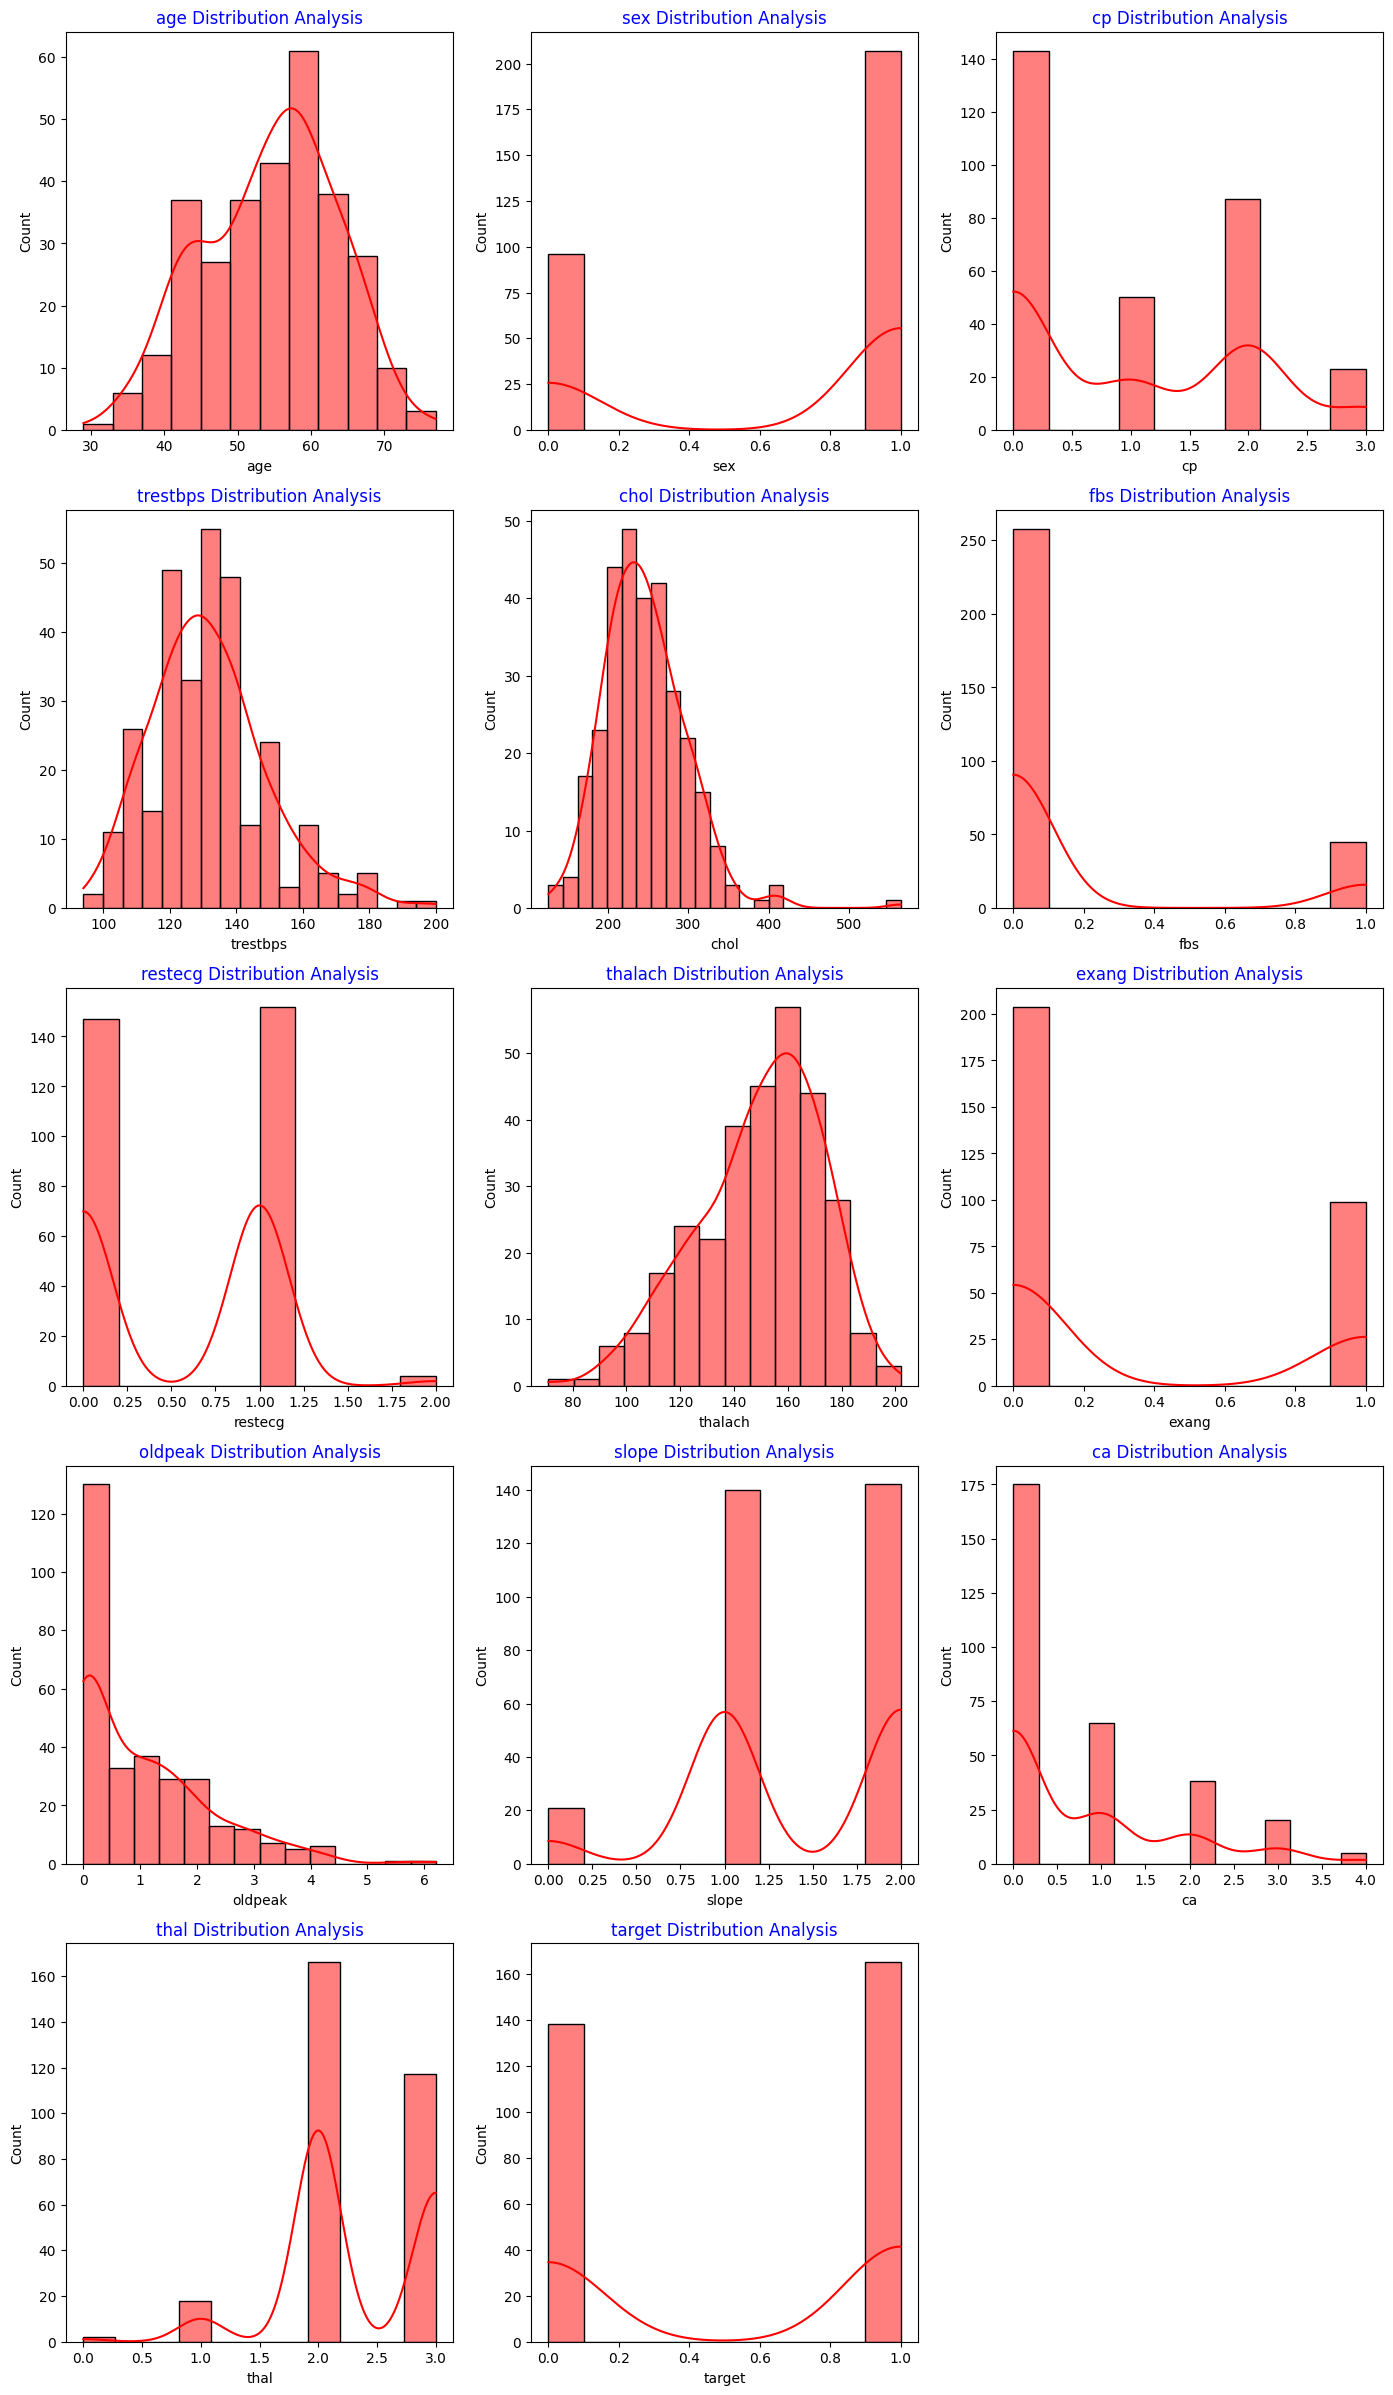

In [12]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color = 'Blue')
    sns.histplot(df[j],kde = True,color = 'r')

plt.savefig('All Numerical Features Analysis.jpeg',dpi = 500)
plt.show()


In [13]:
# Target col not that much imbalance, we can proceed, if imbalance found we need to balance using sampling

###### 3.11: Bivariate Analysis, To check Correlation of features vs target

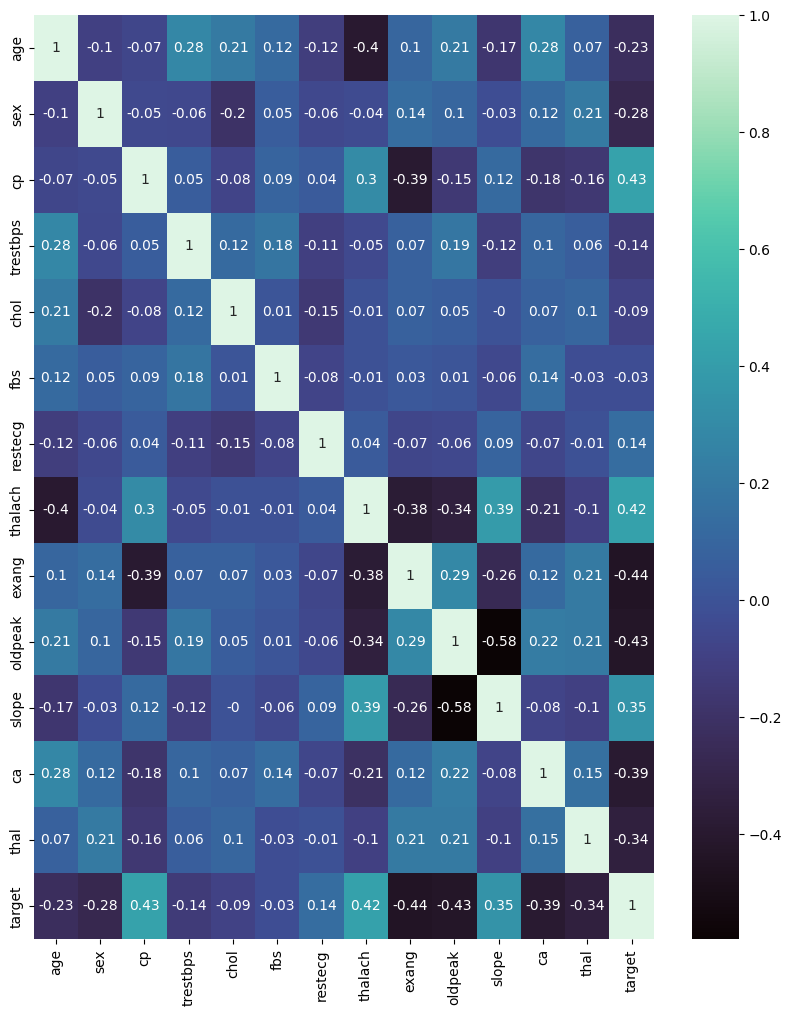

In [14]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot = True)
plt.show()

In [15]:
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease

In [16]:
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

In [17]:
# 3.12: Target vs Features
df.corr()['target'].sort_values(ascending = False).reset_index()


,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


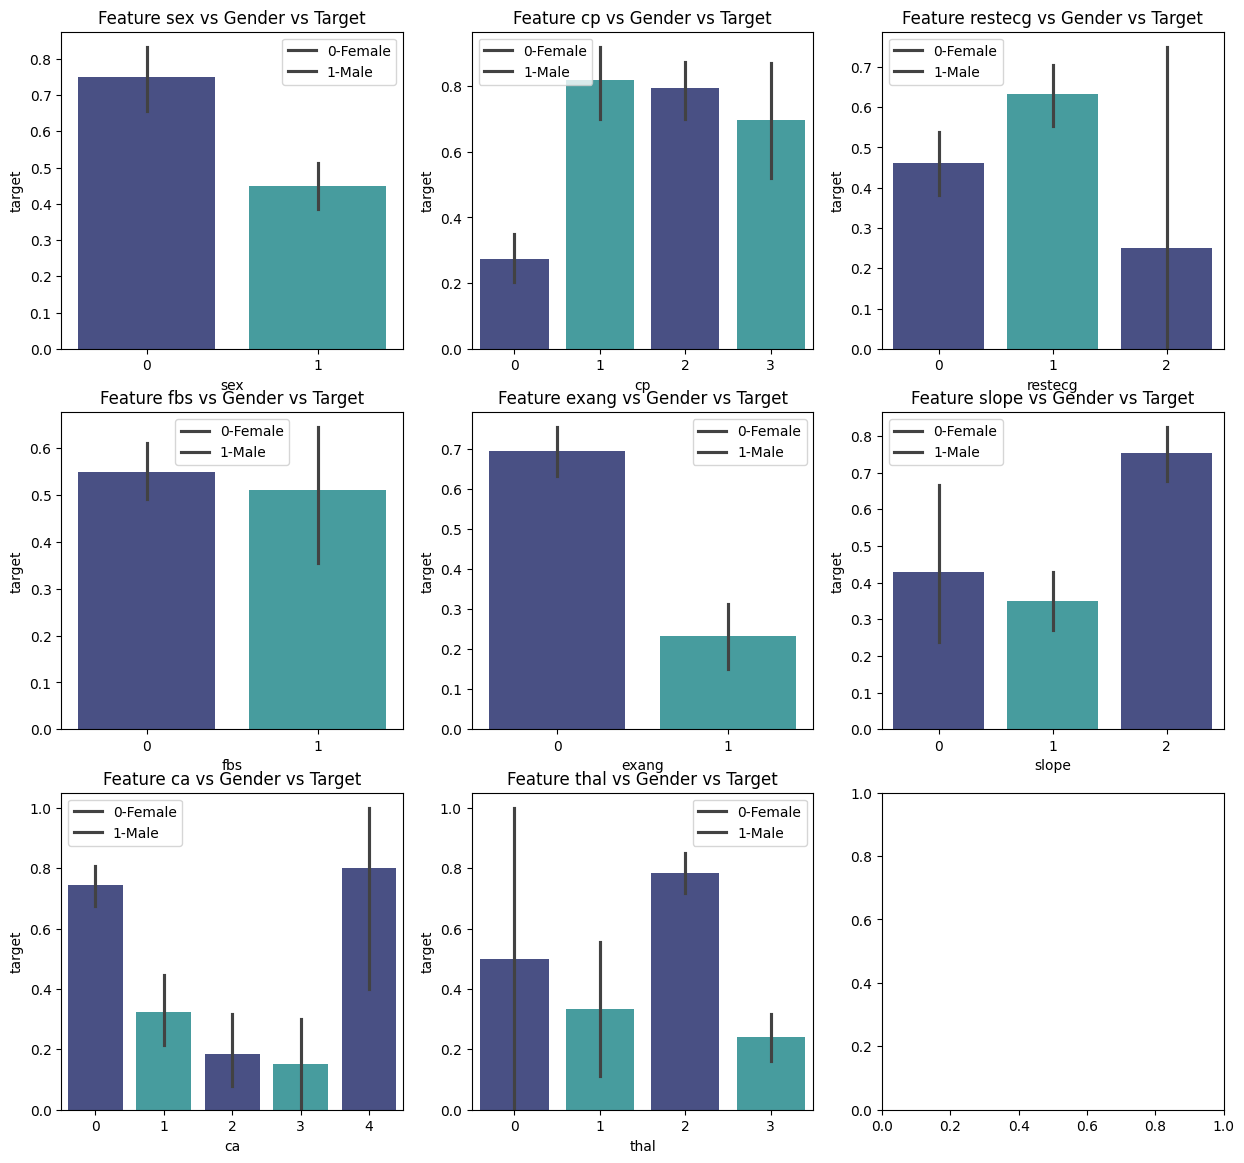

In [18]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend(['0-Female','1-Male'])
    except:
        ...


plt.show()


###### 3.13 Pairplot features vs Target

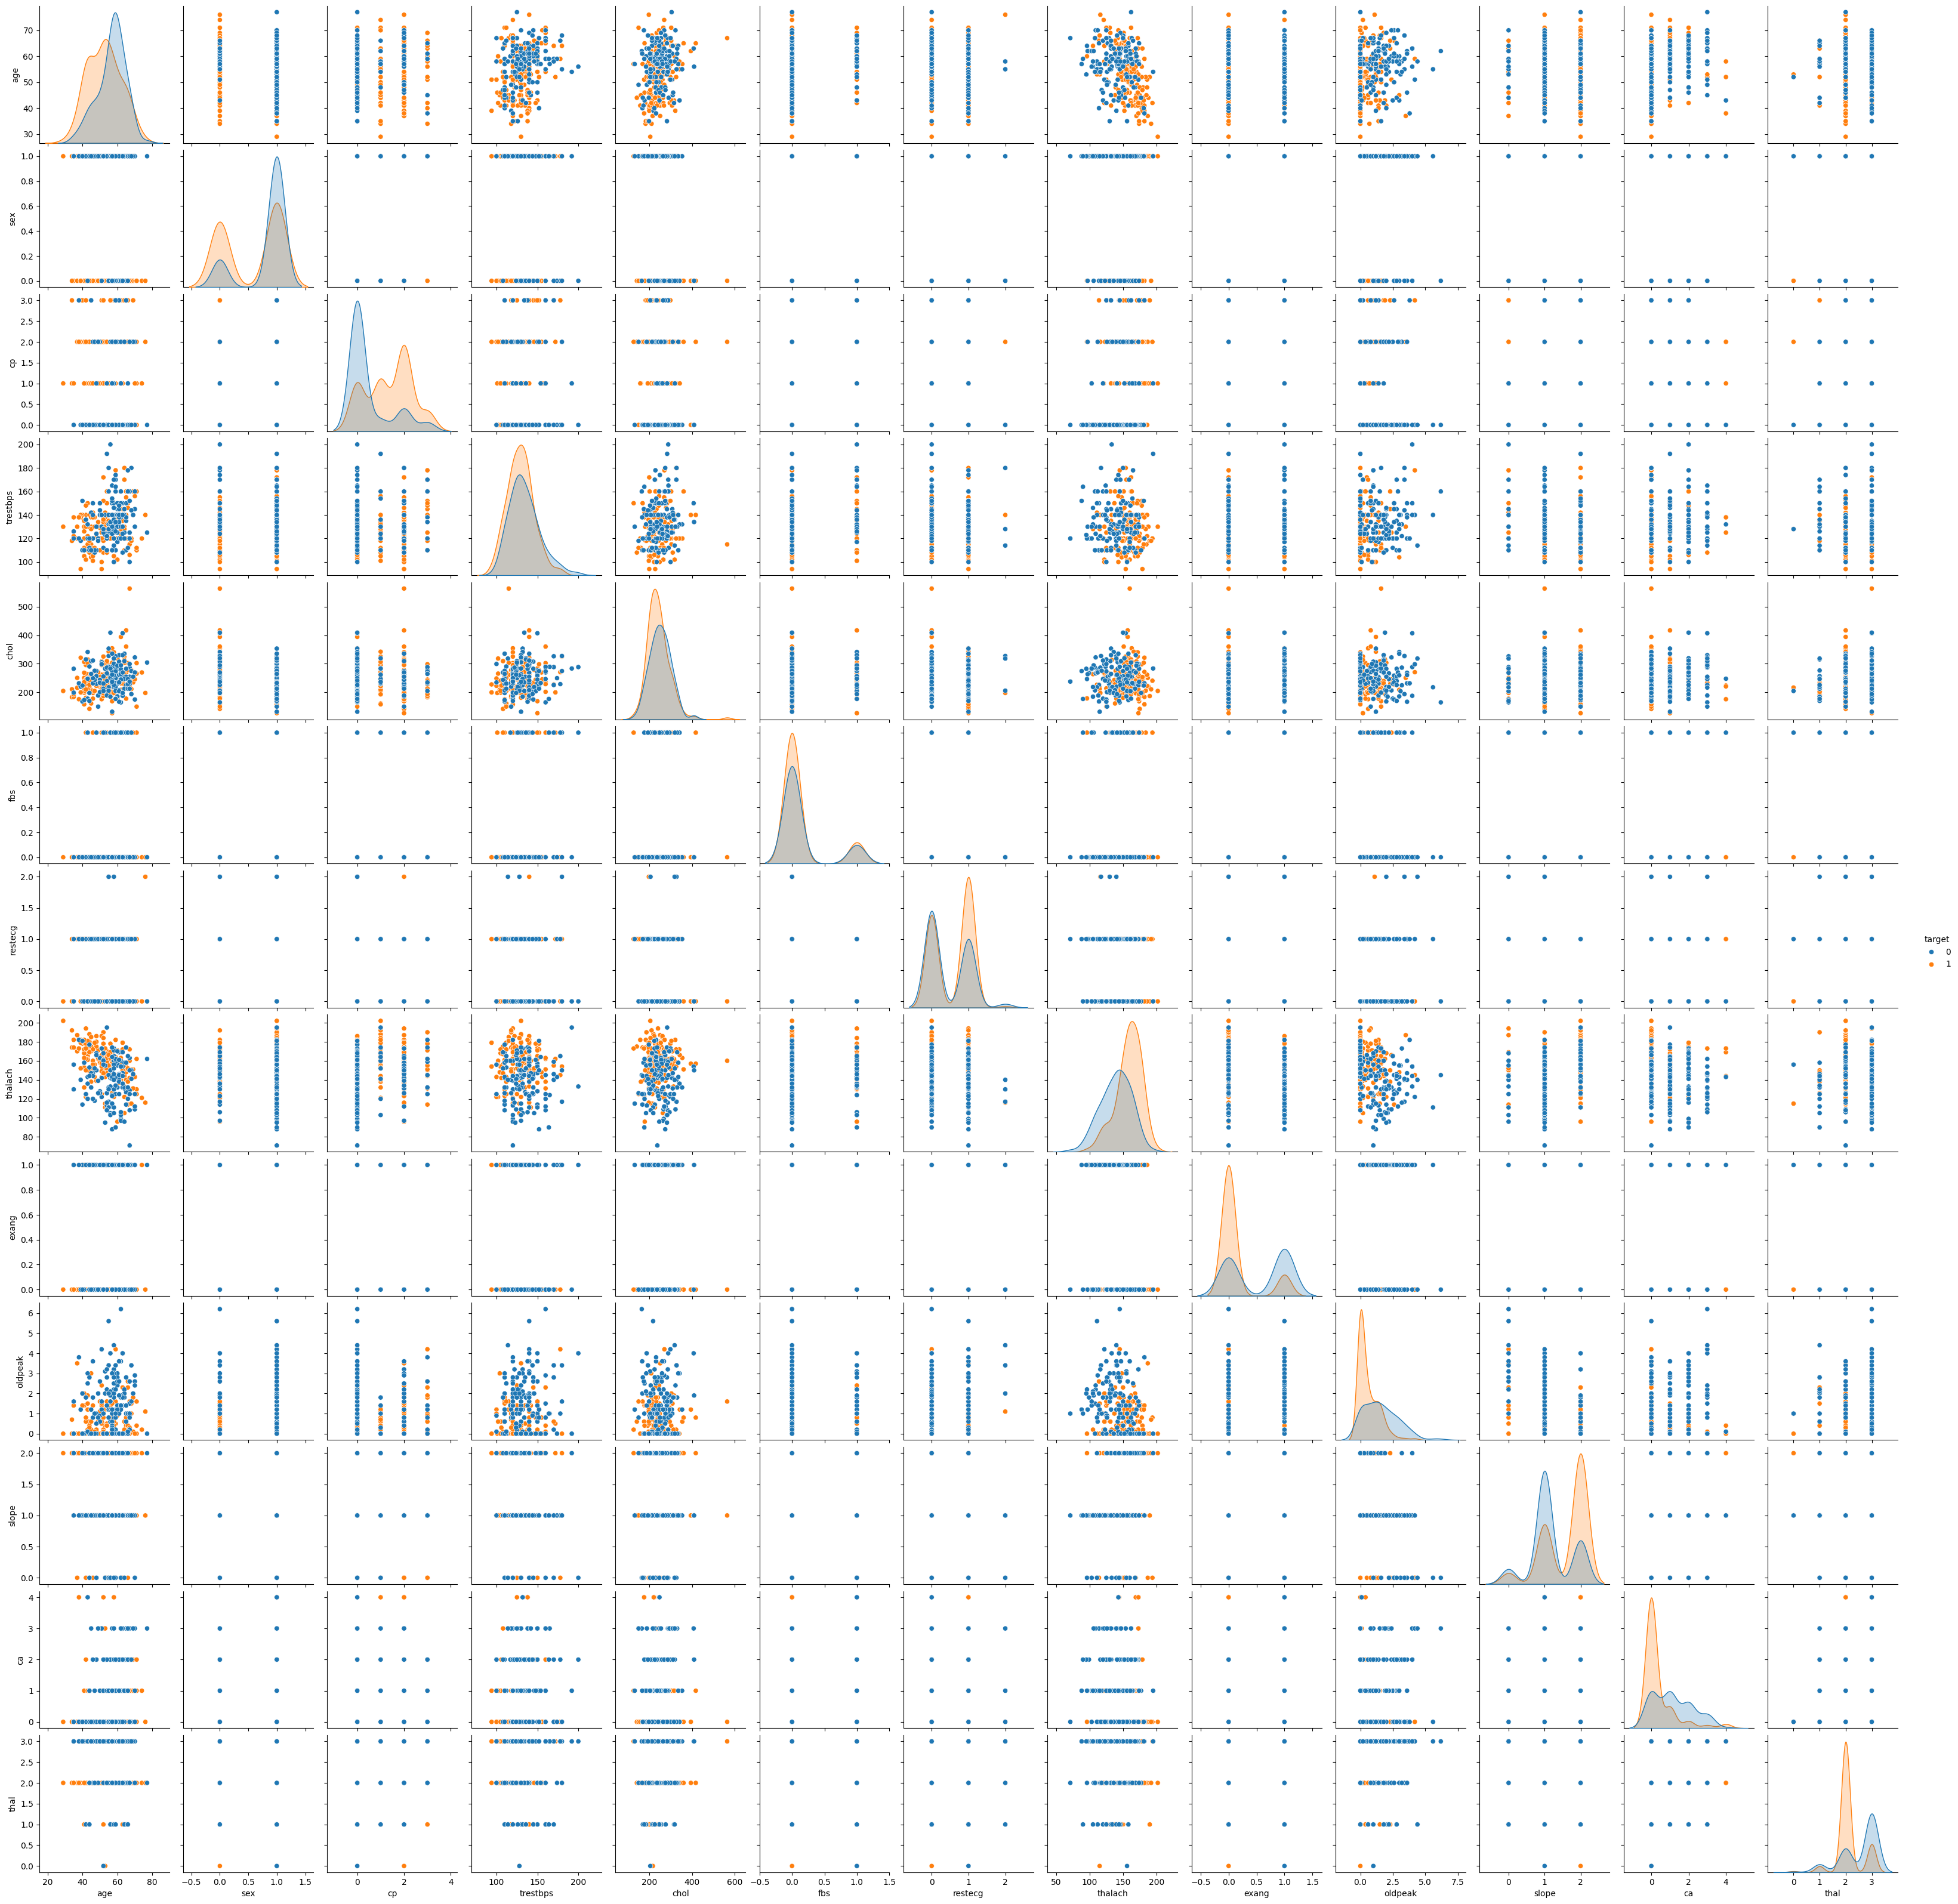

In [19]:
sns.pairplot(data = df,hue = 'target')  # It will Take time to run
plt.show()

# Step 4: Divide Data Into Train and Test
###### Train Test Split

In [20]:
# 4.1 Divide data into Target and Features

X = df.iloc[:,:-1]  # use capital X
y = df['target']


In [21]:
X.shape, y.shape

((303, 13), (303,))

In [22]:
# 4.2 Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Step 5: Multi Model Creation

In [24]:
# Because target value: only: 0,1 (Binary Classification),
# This is not a regression problem

![1_dqeortojRQDxvA_um2d8uA.png](attachment:9ea7f8dd-018c-457f-93cd-61dfb5aadc7a.png)

### Step 5.1: Logistic Regression Model

In [25]:
# It uses the concept of Sigmoid Func: Linear Points converted to Sigmoid(s) Curve

In [26]:
# yPred = mx+ c

In [27]:
# z = y_pred

# y_pred = Linear Regression
# Sigmoid func convert linear line s curve

# Logistic Regression:

![1694183259537.png](attachment:1251c40c-a50d-4b1e-bb97-7aaa1d963337.png)

In [28]:
# Logistic regression: We can Solve Binary and Multiclass classification

In [29]:
# Step 5.1.1 Import Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()  # Model object
model_lr.fit(X_train,y_train)  # Training/Model Building: # Learn Pattern in this step

LogisticRegression()

In [31]:
y_pred = model_lr.predict(X_test)
# y_pred

In [32]:
# 5.1.2: Import model evaluation metrices
# It will be called only when problem is of Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [33]:
# 5.1.3: Import Confusion Matrix to Evaluate classificationModel
from sklearn.metrics import confusion_matrix

In [34]:
# Error: comparison: if Score tie
# Type1, Type2: Type 1 Error danger ,

In [35]:
cm = confusion_matrix(y_test,y_pred)

![1636775030134.png](attachment:628f854f-ba12-499a-88d0-b70eb1c3f42e.png)

![662c42677529a0f4e97e4f9c_644aec2628bc14d83ca873a2_class_guide_cm10.png](attachment:7041d255-50a8-44cf-834e-ddd646fa5135.png)

In [36]:
print(cm)

[[25  4]
 [ 3 29]]


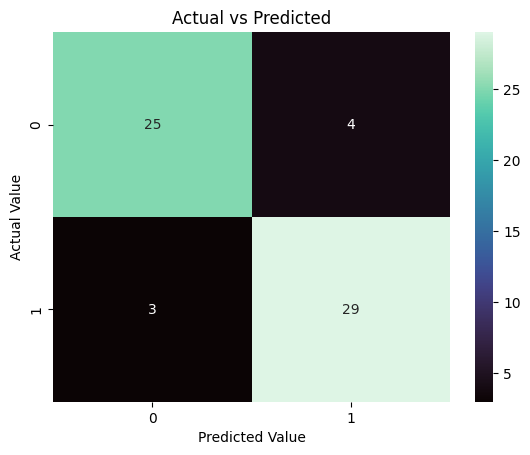

In [37]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [38]:
cm

array([[25,  4],
       [ 3, 29]])

In [39]:
cm.ravel()

array([25,  4,  3, 29])

In [40]:
TN,FP,FN,TP = cm.ravel()

In [41]:
precision_score(y_test,y_pred)

0.8787878787878788

In [42]:
ps = TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [43]:
acs = (TN + TP)/cm.sum()
acs

np.float64(0.8852459016393442)

In [44]:
accuracy_score(y_test,y_pred)

0.8852459016393442

![image.png](attachment:4292fa34-5613-4fb9-8639-8ad5c27be1fb.png)

![image.png](attachment:86d2ce55-0bcb-4204-bb27-048a38d5df22.png)

In [45]:
rs = recall_score(y_test,y_pred)
print('Recall Score is: ',rs)

Recall Score is:  0.90625


In [46]:
# F1 Score to Evaluate both Precision and Recall Score

In [47]:
f1_sc = f1_score(y_test,y_pred)

In [48]:
print('F1 Score: ',f1_sc)

F1 Score:  0.8923076923076924


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [50]:
#5.1.4: Checking Model Score
# Model Score same as accuracy Score
lr_score = model_lr.score(X_test,y_test)
lr_score

0.8852459016393442

### Step 5.2: Naive Bayes ML Model

In [51]:
# pre-assumption: It will pre-assume No correlation b/w features

In [52]:
13/52

0.25

In [53]:
1/13

0.07692307692307693

In [54]:
1/52

0.019230769230769232

In [55]:
1/13/52

0.0014792899408284025

###### Step 5.2.1 Import Naive Model

In [56]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNB: only be use in case of Multi class classification

model_nv = GaussianNB()
model_nv.fit(X_train,y_train)  # Train part/learning

GaussianNB()

In [57]:
y_pred = model_nv.predict(X_test)

In [58]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score:',nv_score)

Naive Bayes Score: 0.8688524590163934


In [59]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8688524590163934
Precision Score:  0.9
Recall Score:  0.84375
F1 Score:  0.8709677419354839


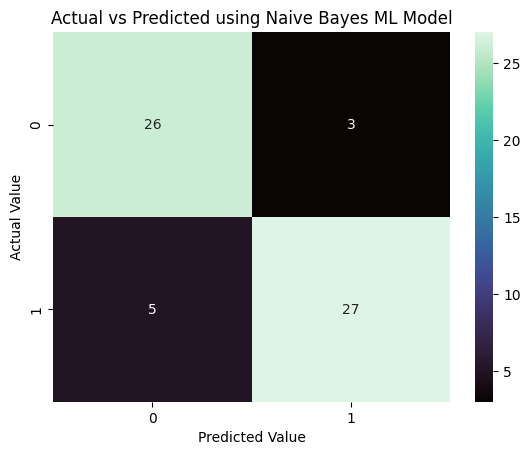

In [60]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [62]:
# Model1>Y_pred>Scores>confusionMatrix>classification_report
# Model2>Y_pred>Scores>confusionMatrix>classification_report
# Model3>Y_pred>Scores>confusionMatrix>classification_report
# Model4>Y_pred>Scores>confusionMatrix>classification_report
# Model5>Y_pred>Scores>confusionMatrix>classification_report
# Model6>Y_pred>Scores>confusionMatrix>classification_report
# best Model Save: Error(low), Accuracy Score High
# Deploy

# Step 5.3: Support Vector Machine ML Model

In [63]:
# SVM

![SVM_margin.png](attachment:46ac3465-5f6e-46af-a8af-47ef452b88ad.png)

![1403824.webp](attachment:e65c9b89-36b8-44c6-bee5-28d49cb37c26.webp)

In [64]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

###### Step 5.3.1: Import Svm Module

In [65]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

###### Step 5.3.2 Predict X_test

In [66]:
y_pred = model_svc.predict(X_test)

###### Step 5.3.3 Checking Scores and Confusion Matrix

In [67]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.7049180327868853
Precision Score:  0.6666666666666666
Recall Score:  0.875
F1 Score:  0.7567567567567568


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



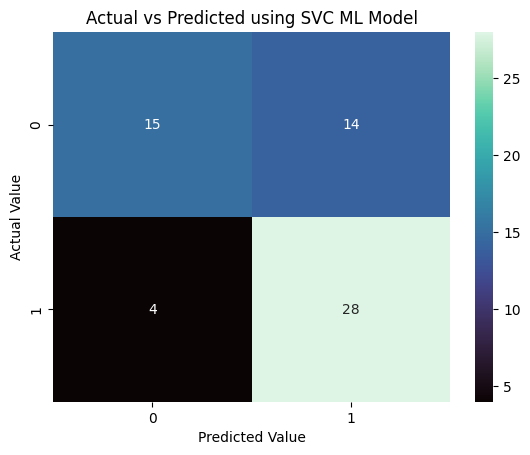

In [69]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [70]:
svm_score = accuracy_score(y_test,y_pred)

In [71]:
lr_score,nv_score,svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

In [72]:
model_svc.score(X_test,y_test)

0.7049180327868853

# Step 5.4 Decision Tree ML Model

![thumb@1024_rr6cuudl59r-decision-trees-image1.webp](attachment:459d5612-d75f-451f-a627-030285da39f2.webp)

###### Step 5.4.1 Import Decision Tree Model

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
# 5.4.2 Step Predict y_pred

y_pred = model_dt.predict(X_test)

In [76]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8524590163934426
Precision Score:  0.9259259259259259
Recall Score:  0.78125
F1 Score:  0.847457627118644


In [77]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.8524590163934426

In [78]:
from sklearn.tree import plot_tree

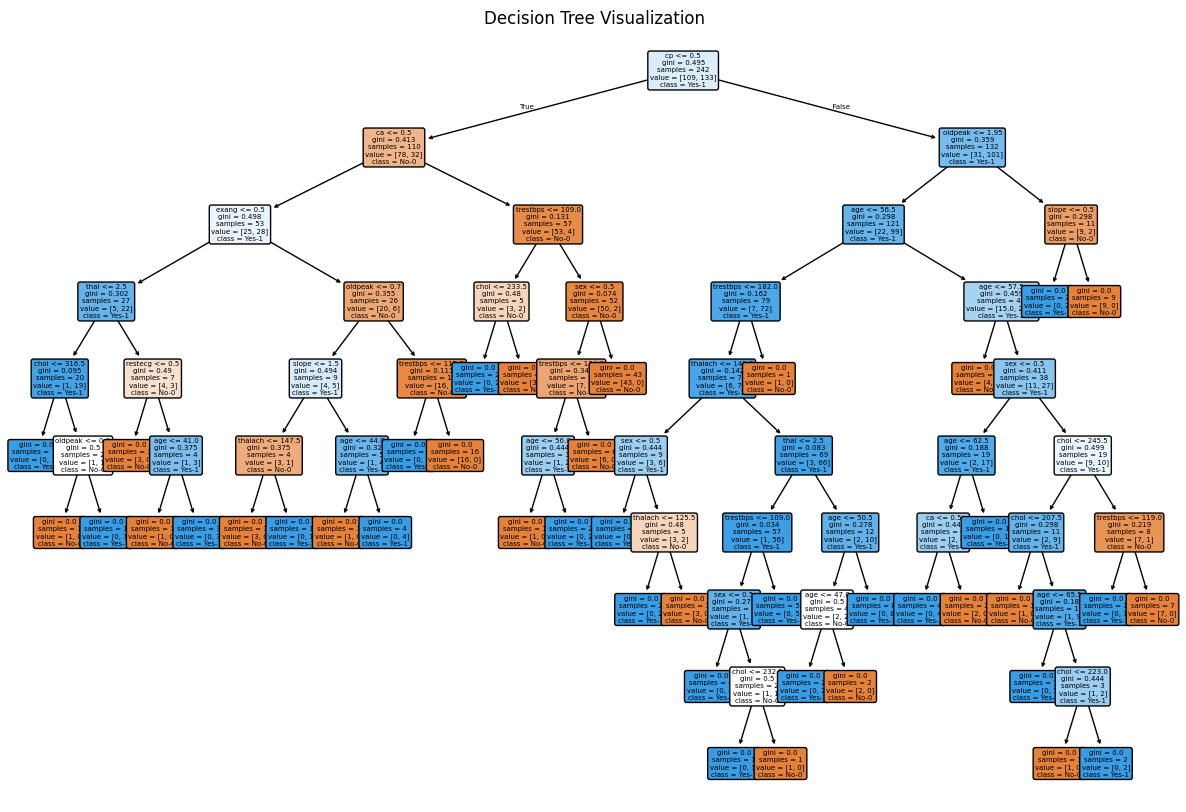

In [79]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

# Step 5.5: Ensemble ML Model
- `Bagging Technique`: Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority
- `Boosting Technique`: Next model learn from previous model and boost it minimize error to improve score

![1zTgGBTQIMlASWm5QuS2UpA.jpg](attachment:5783c4f6-6e2c-4bb0-8909-808ac016b1d1.jpg)

# Step 5.5.1 Bagging  Technique Model>> Random Forest ML Model

In [80]:
# Random Forest: Bags of Multiple Decision Trees Models
# Default Trees = 100
# Bagging technique( Ensemble)

![26-1024x761.jpg](attachment:e2c7db90-3f97-4c85-8c60-c3404dd745d0.jpg)

In [81]:
# (2.2 + 2.4 + 2.5)/3

In [82]:
# Random Forest regression problem: Avg of Final value>> 2.2 + 2.4 + 2.5>> 2.36
# Random Forest Classification>> Binary/Multiclass classification >> Majority Voting

###### Step 5.5.2 Import Random Forest Model

In [83]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 200) # Parameter change Default Tree 100 to 200

model_rf.fit(X_train,y_train)  # Learning

RandomForestClassifier(n_estimators=200)

###### Step 5.5.3 y_pred prediction based on X_test

In [84]:
y_pred = model_rf.predict(X_test)

In [85]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8688524590163934
Precision Score:  0.8529411764705882
Recall Score:  0.90625
F1 Score:  0.8787878787878788


In [86]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.8688524590163934

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



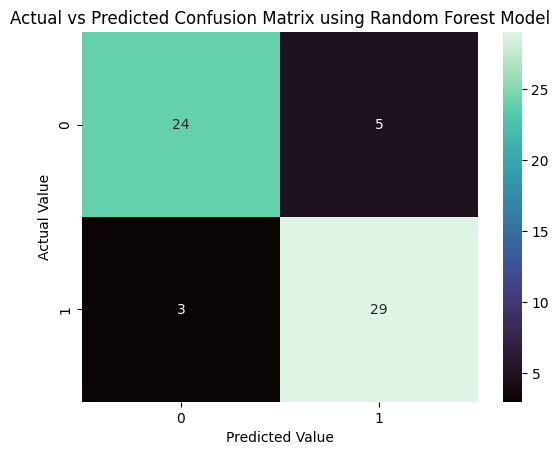

In [88]:
# Step 5.3.4
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using Random Forest Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Step 5.6 Ensemble Boosting technique: Adaboost, Gradientboost, XGboost

In [89]:
# Adaboost: Adaptive Boosting
# Gradientboost: GBM
# LBM: Gradientboost: LGBM
# XGboost: Extreme Gradient Boosting:
# Catboost: Categorical: textual data:

In [90]:
# XGboost: Extreme Gradient Boosting:

![1-s2.0-S1568494623000844-gr6.jpg](attachment:d0576e68-7e25-4590-bc9e-17bfe981c6cf.jpg)

#### Step 5.6.1: Import XGboost ML Algorithm

In [91]:
# pip install xgboost

In [92]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier() # Hyperparameters: Model Fine tune  objective="binary:logistic", random_state=42, learning_rate = 0.001
model_xgb.fit(X_train,y_train)  # NONE: Hyperparameters: Model Fine tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [93]:
y_pred = model_xgb.predict(X_test)

In [94]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

## Step 5.7 KNN: Regression and Classification

![euclidean-distance.png](attachment:f0c01489-8753-4dac-b0f6-008fa996983c.png)

![0_nBQ9HKuxTaMtR0Bi.png](attachment:6fd43547-3c99-469f-8a1c-a87af80aaf0a.png)

# Step 5.7.1: Import KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
model_knn = KNeighborsClassifier(n_neighbors=14) # k= 14

model_knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=14)

In [97]:
y_pred = model_knn.predict(X_test)

In [98]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



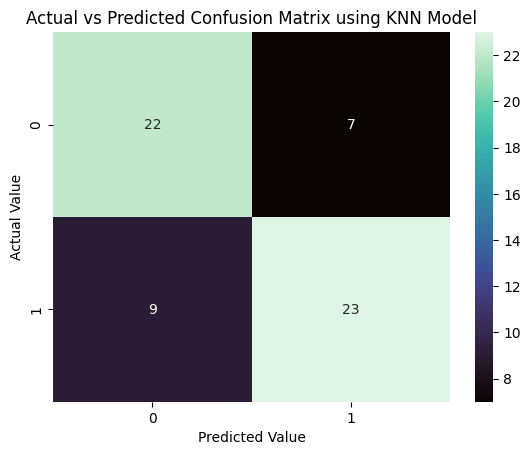

In [100]:
# Step 5.3.4
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using KNN Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Step 5.8: Artificial Neural network using Deep learning

In [101]:
# ML works only on Limited data
# If Input Changes ML Model fail(8 Features col: 8)

In [102]:
# Deep learning: dense(Deep) Neural Network: trained on Multiple
# possibilities

![neural_network_architecture8XR2PC.webp](attachment:558fe615-6c1e-4401-ab8f-e919e151b43a.webp)

In [103]:
# keras tensor flow:
# tensors: array

![94912bosem.png](attachment:cbcb06c6-3f23-4b03-8293-f397513fc382.png)

![1688885174323.jpg](attachment:ad62b9b7-64b8-4d80-a5b5-93cbafd87dc7.jpg)

# Step 5.8.1 ANN Model Creation

In [104]:
# pip install keras
# pip install tensorflow

In [105]:
from keras.models import Sequential
from keras.layers import Dense

In [106]:
# 5.8.2 Model Building
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


In [107]:
# 5.8.3 Model Training
model.fit(X_train,y_train,epochs=300)  # iteration during retraining: epochs=300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4439 - loss: 30.2637  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4574 - loss: 22.8951 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4282 - loss: 15.7350 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3963 - loss: 11.3145 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3808 - loss: 7.8841 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3633 - loss: 7.8029 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3872 - loss: 7.4076 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4383 - loss: 7.3220 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4177 - loss: 7.1553 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3866 - loss: 6.5763 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3964 - loss: 6.5039 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3991 

In [108]:
# 5.8.4 pred y_value

y_pred = model.predict(X_test)
y_pred  = [round(i[0]) for i in  y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [109]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8524590163934426

# Step 6 All Model Comparison

In [110]:
all_model_score  = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


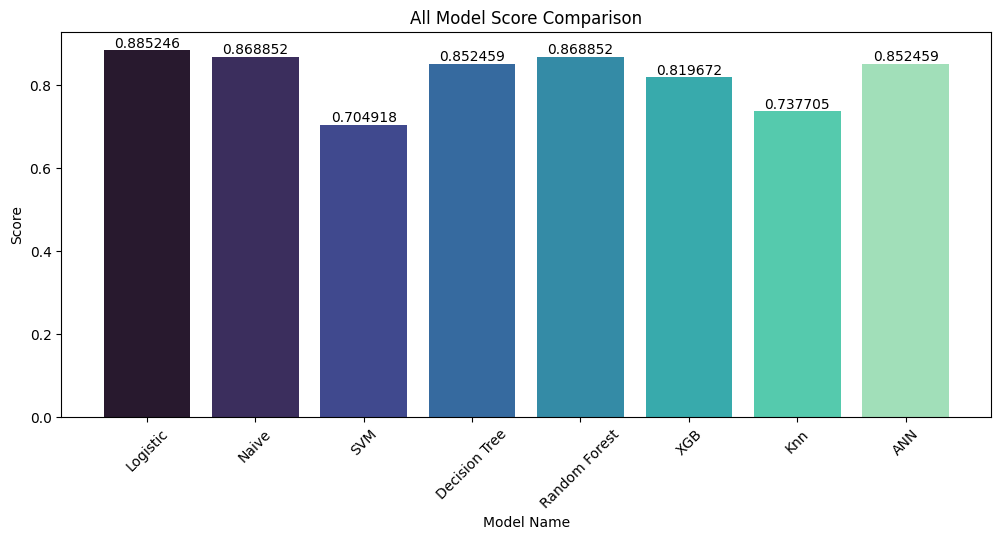

In [111]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# Step 7 Best Model SAVE

In [112]:
# lr has highest score so the Final Model is Logistic Regression

In [113]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done123')

Done123


In [114]:
# # Live Deployment: Assignment
# Requirements.txt
# Github upload
# Streamlit